<a href="https://colab.research.google.com/github/ZaichenkoNA/Stat_Prac/blob/main/Proekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

#from google.colab import drive
#drive.mount('/content/drive')
#credits_df = pd.read_csv("./drive/MyDrive/credits.csv", low_memory=False)
#titles_df = pd.read_csv("./drive/MyDrive/titles.csv", low_memory=False)

credits_df = pd.read_csv("credits.csv", low_memory=False)
titles_df = pd.read_csv("titles.csv", low_memory=False)

print(credits_df.head())
print(titles_df.head())

   person_id       id             name                character   role
0       3748  tm84618   Robert De Niro            Travis Bickle  ACTOR
1      14658  tm84618     Jodie Foster            Iris Steensma  ACTOR
2       7064  tm84618    Albert Brooks                      Tom  ACTOR
3       3739  tm84618    Harvey Keitel  Matthew 'Sport' Higgins  ACTOR
4      48933  tm84618  Cybill Shepherd                    Betsy  ACTOR
         id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent

In [29]:
print(credits_df.info())
print(titles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64 

In [30]:

print(titles_df.describe())

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5850.000000  5850.000000  2106.000000  5368.000000  5.352000e+03   
mean    2016.417094    76.888889     2.162868     6.510861  2.343938e+04   
std        6.937726    39.002509     2.689041     1.163826  9.582047e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.167500e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.233500e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.494000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5759.000000  5539.000000  
mean         22.637925     6.829175  
std          81.680263     1.170391  
min           0.009442     0.500000  
25%           2.728500     6.100000  
50%           6.821000     6.900000  
75%          16.590000     7.537500  
max        

Проверим отсутствующие данные:

In [31]:
credits_df.isna().sum()


person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [32]:
titles_df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Обработка данных:

In [33]:
import numpy as np

# Подсчет популярности актеров
actor_counts = credits_df["name"].value_counts()
credits_df["actor_popularity"] = credits_df["name"].map(actor_counts)

# Фичи по актерам
actor_popularity_per_movie = credits_df.groupby("id")["actor_popularity"].mean().reset_index()
actor_popularity_per_movie.rename(columns={"actor_popularity": "avg_actor_popularity"}, inplace=True)

actor_count_per_movie = credits_df.groupby("id")["person_id"].count().reset_index()
actor_count_per_movie.rename(columns={"person_id": "num_actors"}, inplace=True)

top_100_actors = set(actor_counts.head(100).index)
credits_df["has_top_actor"] = credits_df["name"].isin(top_100_actors)
top_actor_flag_per_movie = credits_df.groupby("id")["has_top_actor"].max().reset_index()

# Объединяем с основной таблицей
titles_df = titles_df.merge(actor_popularity_per_movie, on="id", how="left")
titles_df = titles_df.merge(actor_count_per_movie, on="id", how="left")
titles_df = titles_df.merge(top_actor_flag_per_movie, on="id", how="left")

Обработаем пропуски:

In [34]:
titles_df["avg_actor_popularity"] = titles_df["avg_actor_popularity"].fillna(0)
titles_df["num_actors"] = titles_df["num_actors"].fillna(0)
titles_df["has_top_actor"] = titles_df["has_top_actor"].fillna(False)
titles_df["runtime"] = titles_df["runtime"].fillna(titles_df["runtime"].median())
titles_df["tmdb_popularity"] = titles_df["tmdb_popularity"].fillna(0)
titles_df["imdb_votes"] = titles_df["imdb_votes"].fillna(0)

C:\Users\kira_\AppData\Local\Temp\ipykernel_1104\3010136772.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titles_df["has_top_actor"] = titles_df["has_top_actor"].fillna(False)


In [35]:
# Обработка жанров (one-hot encoding)
genres_exploded = titles_df["genres"].str.strip("[]").str.replace("'", "").str.split(", ")
unique_genres = set([g for sublist in genres_exploded.dropna() for g in sublist])

# Формируем DataFrame с бинарными признаками для каждого жанра
genre_df = pd.DataFrame({
    f"genre_{genre}": genres_exploded.apply(lambda x: genre in x if isinstance(x, list) else False)
    for genre in unique_genres
})
titles_df = pd.concat([titles_df, genre_df], axis=1)

In [36]:
# Обработка стран (one-hot encoding)
countries_exploded = titles_df["production_countries"].str.strip("[]").str.replace("'", "").str.split(", ")
unique_countries = set([c for sublist in countries_exploded.dropna() for c in sublist])
country_df = pd.DataFrame({
    f"country_{country}": countries_exploded.apply(lambda x: country in x if isinstance(x, list) else False)
    for country in unique_countries
})
titles_df = pd.concat([titles_df, country_df], axis=1)

titles_df = titles_df.dropna(subset=["imdb_score"])
print("Предобработка завершена!")

Предобработка завершена!


Найдём распределения:

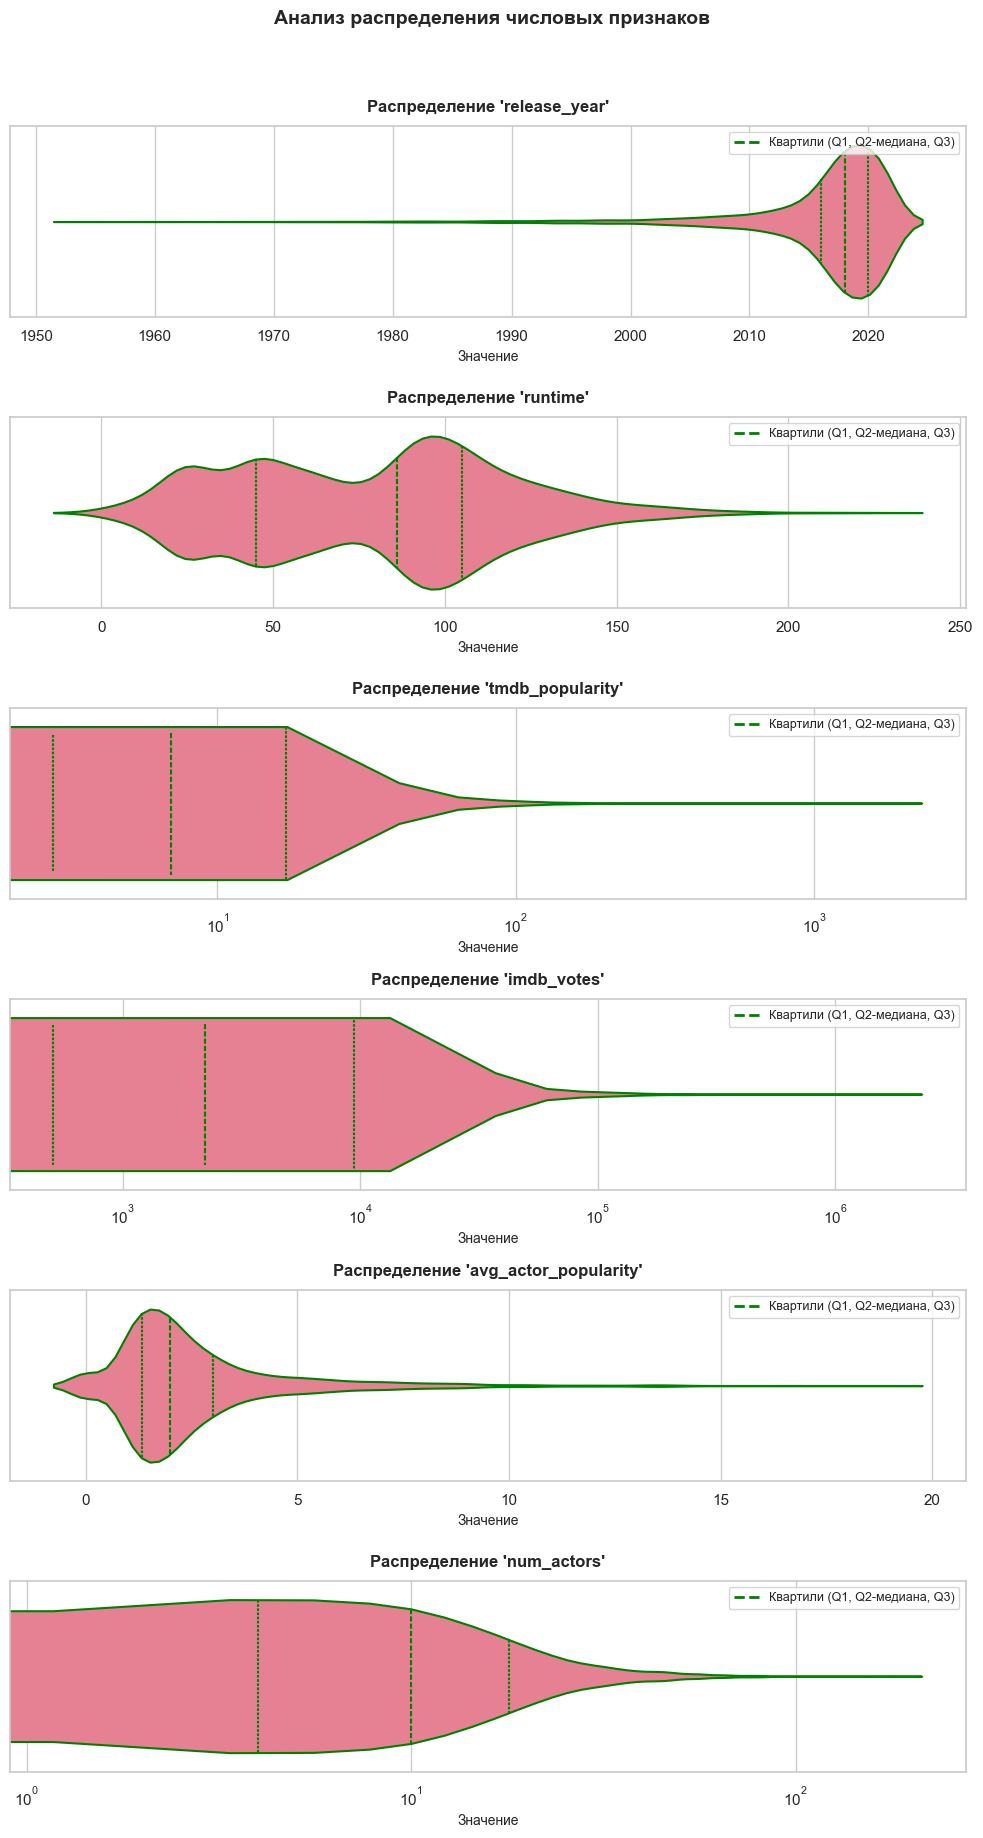

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # Для создания кастомных элементов легенды

# Настройка стиля
sns.set_theme(style="whitegrid", palette="husl")

# Числовые признаки
numeric_features = ["release_year", "runtime", "tmdb_popularity", "imdb_votes", "avg_actor_popularity", "num_actors"]

# Создаем полотно
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 18), dpi=100)

for i, feature in enumerate(numeric_features):
    ax = axes[i]

    # Рисуем violin plot с квартилями
    sns.violinplot(
        x=titles_df[feature],
        ax=ax,
        inner="quartile",
        linewidth=1.5,
        linecolor="green",  # Явно задаем цвет линий
    )

    # Настройка заголовка и осей
    ax.set_title(f"Распределение '{feature}'", fontsize=12, pad=10, fontweight="bold")
    ax.set_xlabel("Значение", fontsize=10)

    # Логарифмическая шкала для некоторых признаков
    if feature in ["imdb_votes", "tmdb_popularity", "num_actors"]:
        ax.set_xscale("log")

    # Создаем кастомную легенду для квартилей
    legend_elements = [
        Line2D([0], [0], color='green', linestyle='--', lw=2,
               label='Квартили (Q1, Q2-медиана, Q3)'),
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.suptitle("Анализ распределения числовых признаков", fontsize=14, y=1.02, fontweight="bold")
plt.tight_layout()
plt.show()

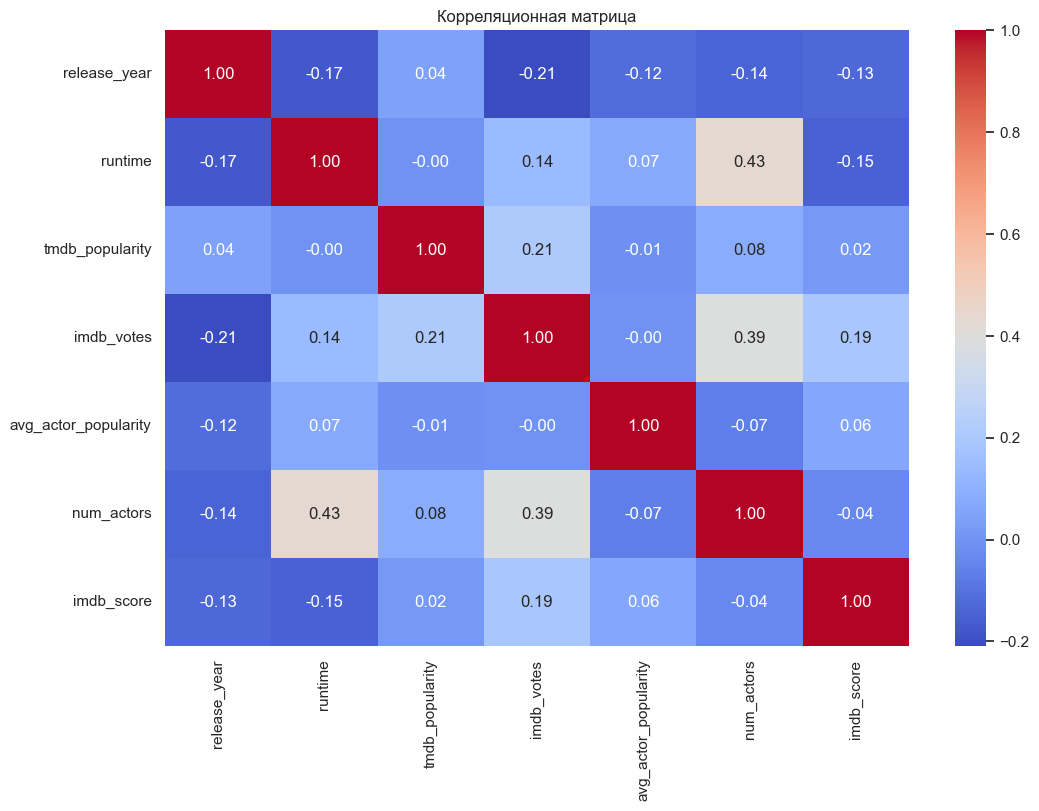

In [38]:
# Корреляционная матрица
corr_matrix = titles_df[numeric_features + ["imdb_score"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Посмотрим на рейтинг по странам:

C:\Users\kira_\AppData\Local\Temp\ipykernel_1104\569035096.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


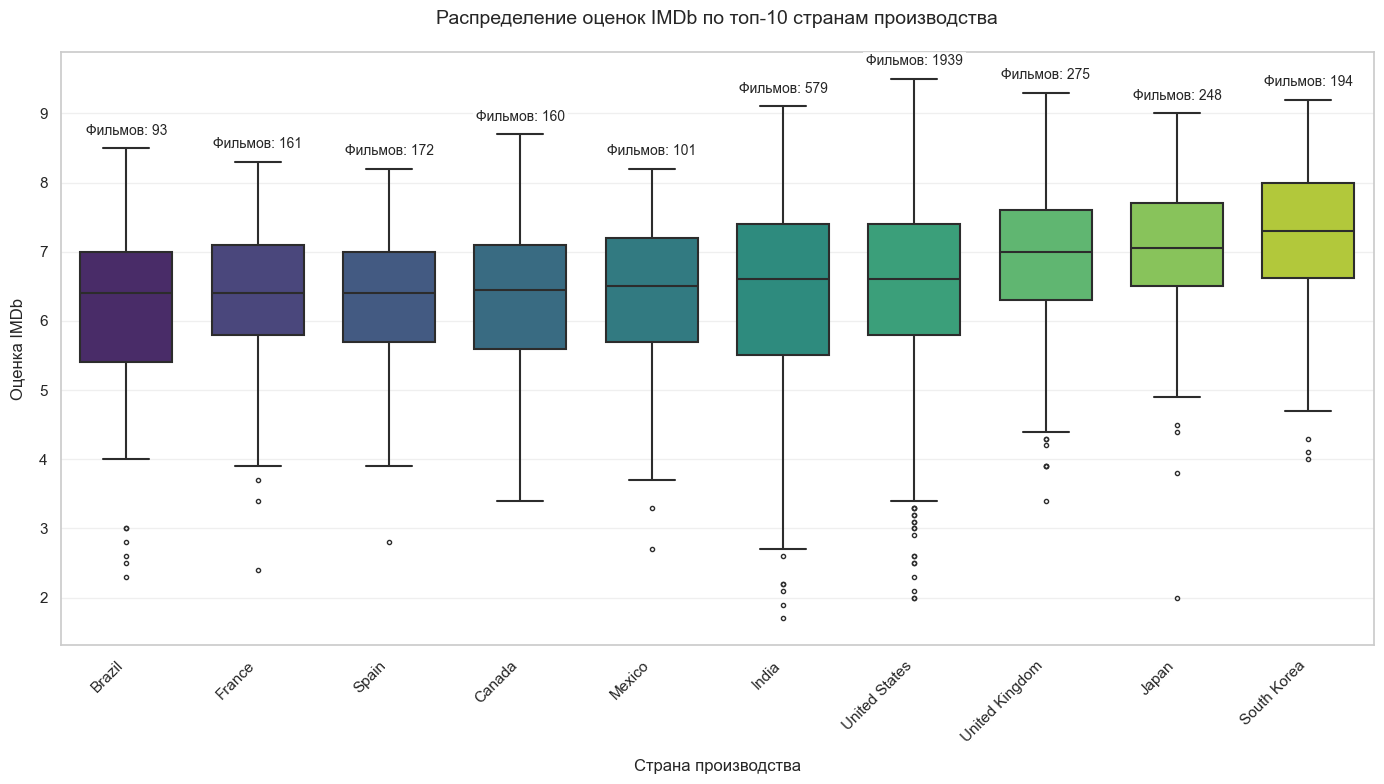

In [39]:
import pycountry

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Функция для преобразования кодов стран в полные названия
def extract_and_convert_country(raw_str):
    if not isinstance(raw_str, str):  # Проверяем, что это строка
        return None
    cleaned = raw_str.strip("[]").replace("'", "").replace("\"", "").strip()
    if not cleaned:
        return None
    codes = [code.strip() for code in cleaned.split(",") if code.strip()]
    if not codes:
        return None
    code = codes[0]
    country = pycountry.countries.get(alpha_2=code.upper())
    return country.name if country else None

titles_df["production_countries_full"] = titles_df["production_countries"].apply(extract_and_convert_country)

valid_titles = titles_df[titles_df["production_countries_full"].notnull()]
filtered_titles = valid_titles.copy()
# Заменяем название Южной Кореи на более короткое
filtered_titles["production_countries_full"] = filtered_titles["production_countries_full"].replace(
    "Korea, Republic of", "South Korea")

# Выбираем топ-10 стран по количеству фильмов
top_countries = filtered_titles["production_countries_full"].value_counts().head(10).index
filtered_df = filtered_titles[filtered_titles["production_countries_full"].isin(top_countries)]

# Сортируем страны по медианному значению IMDb
country_order = filtered_df.groupby("production_countries_full")["imdb_score"].median().sort_values().index

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x="production_countries_full",
    y="imdb_score",
    data=filtered_df,
    order=country_order,
    palette="viridis",
    width=0.7,
    linewidth=1.5,
    fliersize=3
)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Страна производства", fontsize=12, labelpad=10)
plt.ylabel("Оценка IMDb", fontsize=12, labelpad=10)
plt.title("Распределение оценок IMDb по топ-10 странам производства", fontsize=14, pad=20)

# Добавляем аннотации с количеством фильмов
counts = filtered_df["production_countries_full"].value_counts().loc[country_order]
max_scores = filtered_df.groupby("production_countries_full")["imdb_score"].max().loc[country_order]

for i, country in enumerate(country_order):
    count = counts[country]
    y_pos = max_scores[country] + 0.15
    ax.text(
        i, y_pos, f"Фильмов: {count}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

Посмотрим на рейтинг по актёрам:

C:\Users\kira_\AppData\Local\Temp\ipykernel_1104\377586313.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


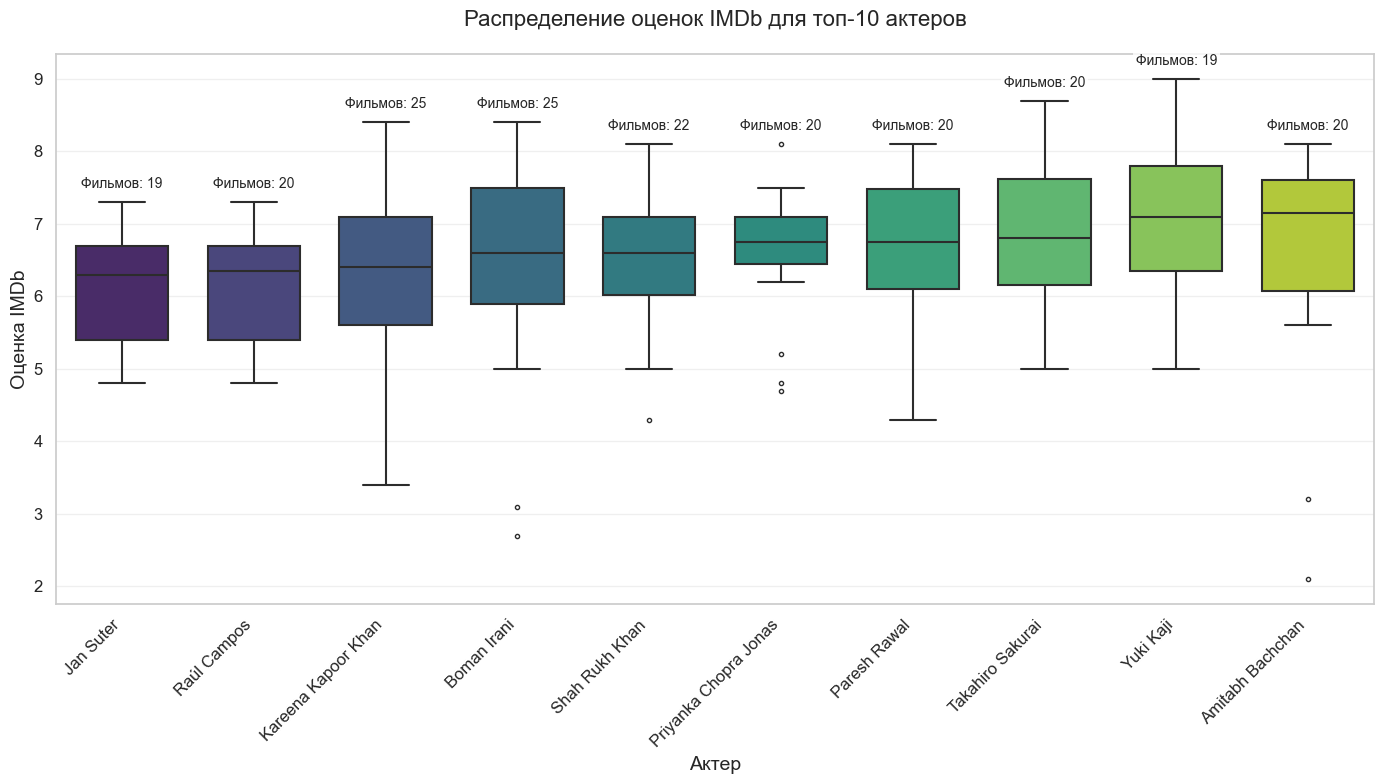

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

actor_scores = pd.merge(
    credits_df[['id', 'name']],
    titles_df[['id', 'imdb_score']],
    on='id',
    how='left'
).dropna()

TOP_N = 10
top_actors = actor_scores['name'].value_counts().head(TOP_N).index
filtered_actors = actor_scores[actor_scores['name'].isin(top_actors)]

actor_order = filtered_actors.groupby('name')['imdb_score'].median().sort_values().index

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
palette = sns.color_palette("husl", TOP_N)

ax = sns.boxplot(
    x='name',
    y='imdb_score',
    data=filtered_actors,
    order=actor_order,
    palette="viridis",
    width=0.7,
    linewidth=1.5,
    fliersize=3,
    showmeans=False
)

counts = filtered_actors['name'].value_counts().loc[actor_order]
for i, actor in enumerate(actor_order):
    count = counts[actor]
    ax.text(
        i,
        filtered_actors[filtered_actors['name'] == actor]['imdb_score'].max() + 0.15,
        f'Фильмов: {count}',
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

plt.title(f'Распределение оценок IMDb для топ-{TOP_N} актеров', fontsize=16, pad=20)
plt.xlabel('Актер', fontsize=14)
plt.ylabel('Оценка IMDb', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Посмотрим на жанры:

C:\Users\kira_\AppData\Local\Temp\ipykernel_1104\2457722052.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\kira_\AppData\Local\Temp\ipykernel_1104\2457722052.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


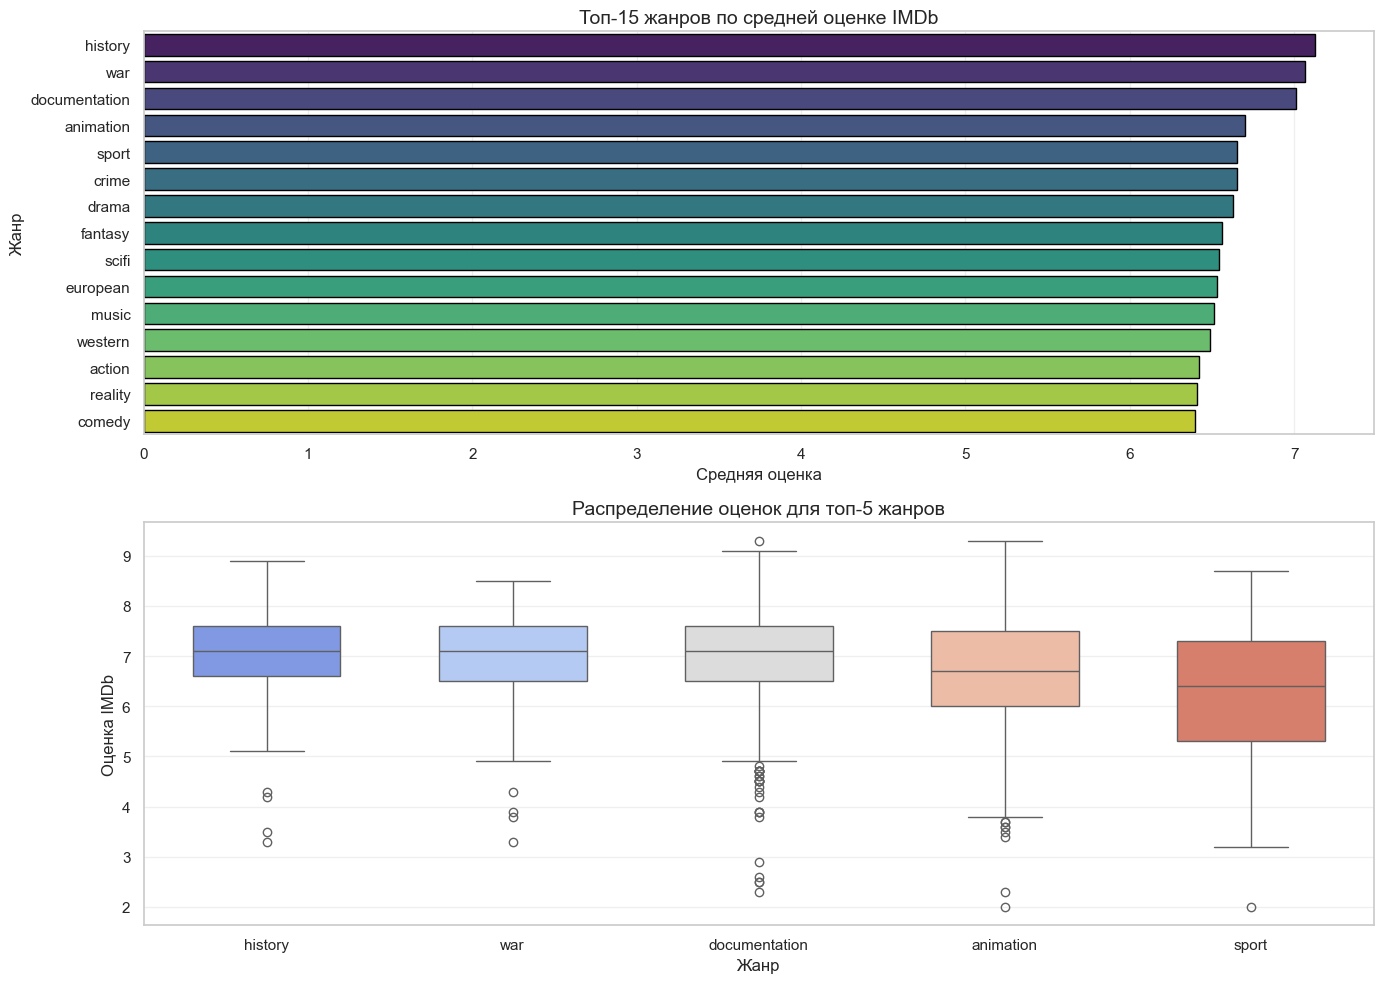

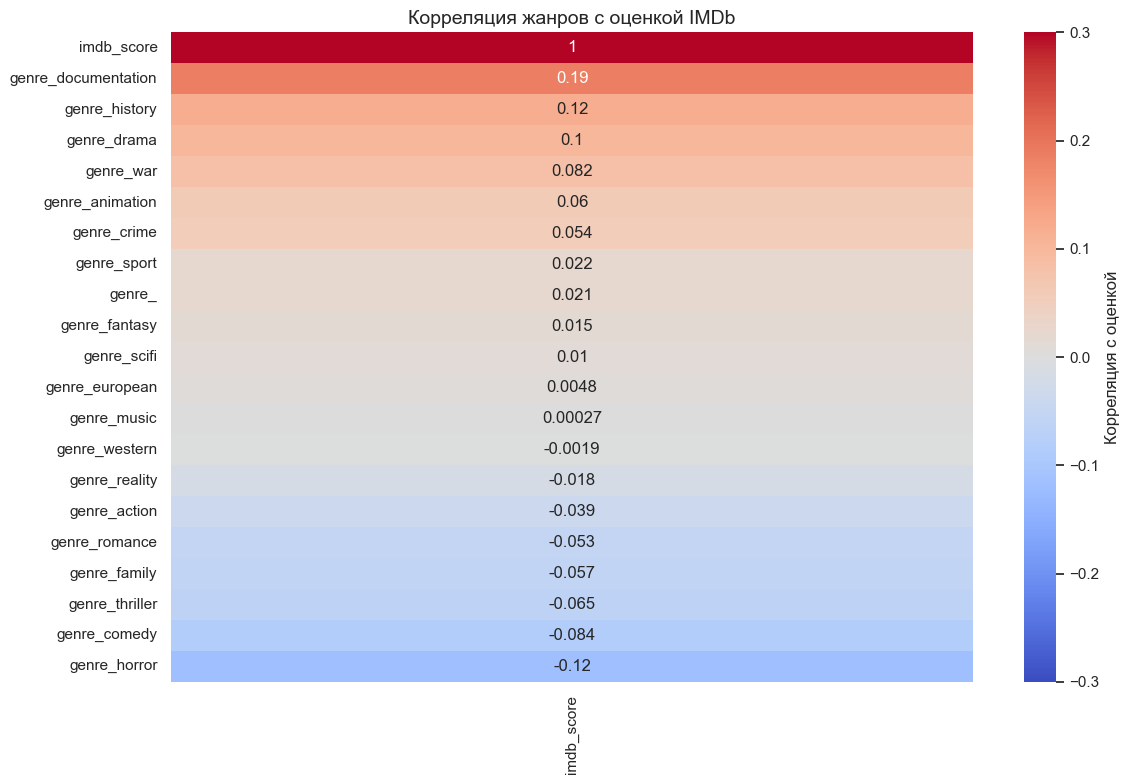

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

# 1. Преобразуем строку жанров в список
titles_df['genres_list'] = titles_df['genres'].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])

# 2. Создаем список уникальных жанров
all_genres = list(set(g for genres in titles_df['genres_list'] for g in genres))

# 3. Создаем one-hot encoding для жанров
for genre in all_genres:
    titles_df[f'genre_{genre}'] = titles_df['genres_list'].apply(lambda x: genre in x)

# 4. Создаем DataFrame для анализа
genre_stats = pd.DataFrame({
    'genre': all_genres,
    'count': [titles_df[f'genre_{g}'].sum() for g in all_genres],
    'mean_score': [titles_df[titles_df[f'genre_{g}']]['imdb_score'].mean() for g in all_genres]
}).sort_values('mean_score', ascending=False)

# 5. Визуализация - Лучший вариант: Комбинированный график
plt.figure(figsize=(14, 10))

# График 1: Средние оценки по жанрам (топ-15)
plt.subplot(2, 1, 1)
sns.barplot(
    x='mean_score',
    y='genre',
    data=genre_stats.head(15),
    palette='viridis',
    edgecolor='black'
)
plt.title('Топ-15 жанров по средней оценке IMDb', fontsize=14)
plt.xlabel('Средняя оценка', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# График 2: Boxplot для топ-5 жанров
plt.subplot(2, 1, 2)
top_5_genres = genre_stats.head(5)['genre'].tolist()
top_genres_df = titles_df[titles_df['genres_list'].apply(lambda x: any(g in x for g in top_5_genres))].copy()
top_genres_df['main_genre'] = top_genres_df['genres_list'].apply(
    lambda x: next((g for g in x if g in top_5_genres), None)
)

sns.boxplot(
    x='main_genre',
    y='imdb_score',
    data=top_genres_df,
    order=top_5_genres,
    palette='coolwarm',
    width=0.6
)
plt.title('Распределение оценок для топ-5 жанров', fontsize=14)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Оценка IMDb', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительно: Тепловая карта корреляции жанров с оценкой
genre_cols = [col for col in titles_df.columns if col.startswith('genre_')]
corr_matrix = titles_df[genre_cols + ['imdb_score']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['imdb_score']].sort_values('imdb_score', ascending=False),
    annot=True,
    cmap='coolwarm',
    vmin=-0.3,
    vmax=0.3,
    center=0,
    cbar_kws={'label': 'Корреляция с оценкой'}
)
plt.title('Корреляция жанров с оценкой IMDb', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

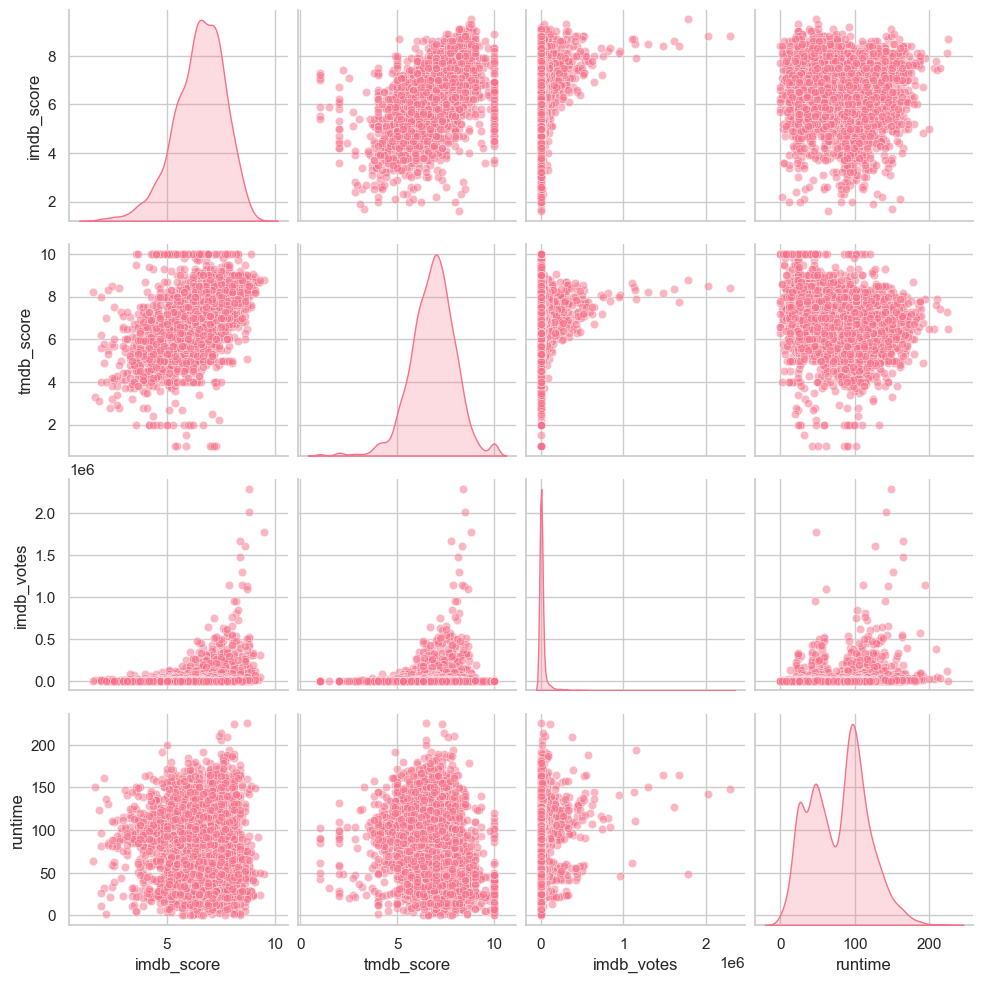

In [42]:
import seaborn as sns

# Выбираем нужные числовые колонки
selected_columns = ["imdb_score", "tmdb_score", "imdb_votes", "runtime"]
pairplot_df = titles_df[selected_columns].dropna()

# Строим pairplot
sns.pairplot(pairplot_df, diag_kind="kde", plot_kws={'alpha': 0.5})

plt.show()

Для предсказания оуенки фильма (imdb_score) мы выбрали градиентный бустинг, потому что он хорошо справляется с нелинейными зависимостями, учитывает сложные взаимодействия между признаками и хорошо масштабируется.

Разделение данных:

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Добавляем новые признаки в DataFrame
titles_df["num_genres"] = titles_df[[f"genre_{g}" for g in unique_genres]].sum(axis=1)
titles_df["actor_score_combo"] = titles_df["avg_actor_popularity"] * titles_df["has_top_actor"]

# Обновляем список признаков
features = ["release_year", "runtime", "avg_actor_popularity", "num_actors", "has_top_actor"] + \
           [f"genre_{g}" for g in unique_genres] + \
           [f"country_{c}" for c in unique_countries] + ["num_genres", "actor_score_combo"]

numeric_features = ["release_year", "runtime", "avg_actor_popularity", "num_actors", "has_top_actor", "num_genres", "actor_score_combo"]

# Разделение на train/test
X = titles_df[features]
y = titles_df["imdb_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучение модели:

In [44]:
# Нормализация числовых данных
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, [f"genre_{g}" for g in unique_genres] + [f"country_{c}" for c in unique_countries])
    ]
)

# Градиентный бустинг XGBoost
from xgboost import XGBRegressor
xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(objective="reg:squarederror", random_state=42))
])

# Гиперпараметры для подбора
param_grid = {
    "model__n_estimators": [100, 200],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 7],
    "model__subsample": [0.8, 1.0],
}

# GridSearchCV для подбора параметров
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=1)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания и оценка
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Лучшие параметры: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 0.8}
MAE: 0.7578
MSE: 0.9973
R2: 0.2850


Кластеризация фильмов по признакам

Цель:
Мы хотим автоматически разделить фильмы на группы (кластеры), основываясь на количественных характеристиках. Это позволяет понять, какие типы фильмов существуют в датасете, какие у них общие свойства, и как можно использовать эту информацию, например, для рекомендаций или анализа рынка.

Используемые признаки:
runtime — длительность фильма;
release_year — год выхода;
tmdb_popularity — популярность на TMDb;
tmdb_score — рейтинг TMDb;
imdb_score — рейтинг IMDb;
imdb_votes — количество голосов на IMDb.

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Объединение таблиц
credits_df = credits_df.rename(columns={"id": "id", "name": "actor_name"})
merged_df = pd.merge(titles_df, credits_df, how="left", on="id")

# Выбор признаков
cluster_features = merged_df[[
    "runtime", "release_year", "tmdb_popularity", "tmdb_score", "imdb_score", "imdb_votes"
]].dropna()

Предобработка данных: мы выбрали числовые признаки и привели их к одному масштабу с помощью StandardScaler.

In [46]:
# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

Кластеризация: применили алгоритм KMeans с 4 кластерами. Число кластеров выбрано эмпирически.

In [47]:
# Кластеризация
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
cluster_features["cluster"] = cluster_labels

Оценка качества: использовали метрику Silhouette Score, которая показывает, насколько хорошо объекты распределены по кластерам.

In [48]:
# Оценка силуэта
sil_score = silhouette_score(X_scaled, cluster_labels)

Визуализация: применили PCA для снижения размерности и визуализации кластеров на плоскости.

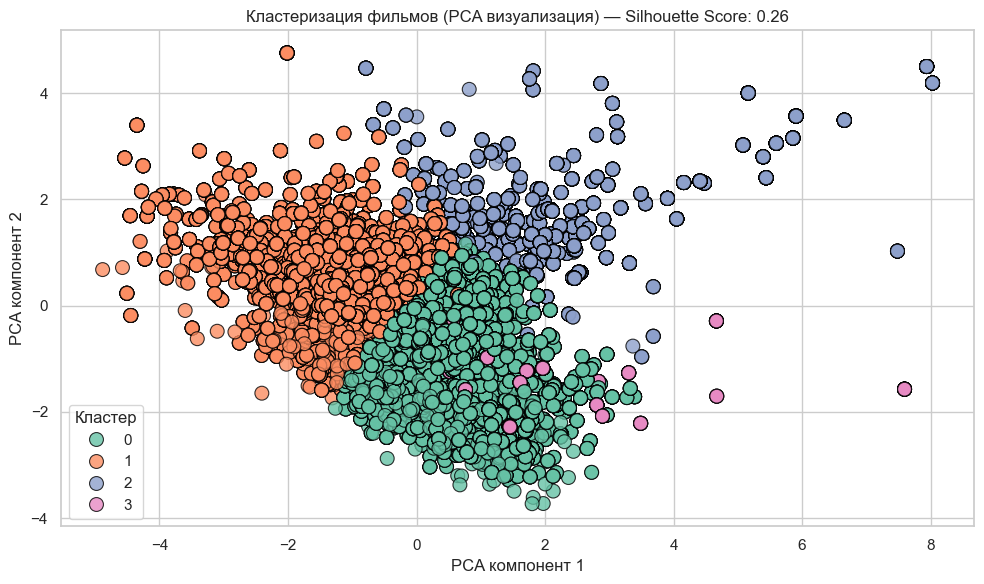

In [49]:
# PCA визуализация
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# Построение графика
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set2", s=100, alpha=0.8, edgecolor='k')
plt.title(f"Кластеризация фильмов (PCA визуализация) — Silhouette Score: {sil_score:.2f}")
plt.xlabel("PCA компонент 1")
plt.ylabel("PCA компонент 2")
plt.grid(True)
plt.legend(title="Кластер")
plt.tight_layout()
plt.show()

На графике видно, что алгоритм выделил несколько чётко различимых групп фильмов. Это может означать, что фильмы действительно имеют различия по характеристикам — например, короткие малопопулярные фильмы, длинные популярные, высокооценённые и т.д.
Silhouette Score показал, что разделение достаточно чёткое и информативное.

Общие данные про кластеры:
Кластер 0:
        - Средняя длительность фильма: 83.0 мин
        - Средний рейтинг IMDb: 7.1
        - Средний рейтинг TMDb: 7.4
        - Популярные жанры: нет данных
------------------------------------------------------------
Кластер 1:
        - Средняя длительность фильма: 103.0 мин
        - Средний рейтинг IMDb: 5.6
        - Средний рейтинг TMDb: 5.9
        - Популярные жанры: нет данных
------------------------------------------------------------
Кластер 2:
        - Средняя длительность фильма: 131.8 мин
        - Средний рейтинг IMDb: 7.4
        - Средний рейтинг TMDb: 7.2
        - Популярные жанры: нет данных
------------------------------------------------------------
Кластер 3:
        - Средняя длительность фильма: 93.6 мин
        - Средний рейтинг IMDb: 6.6
        - Средний рейтинг TMDb: 7.3
        - Популярные жанры: нет данных
------------------------------------------------------------


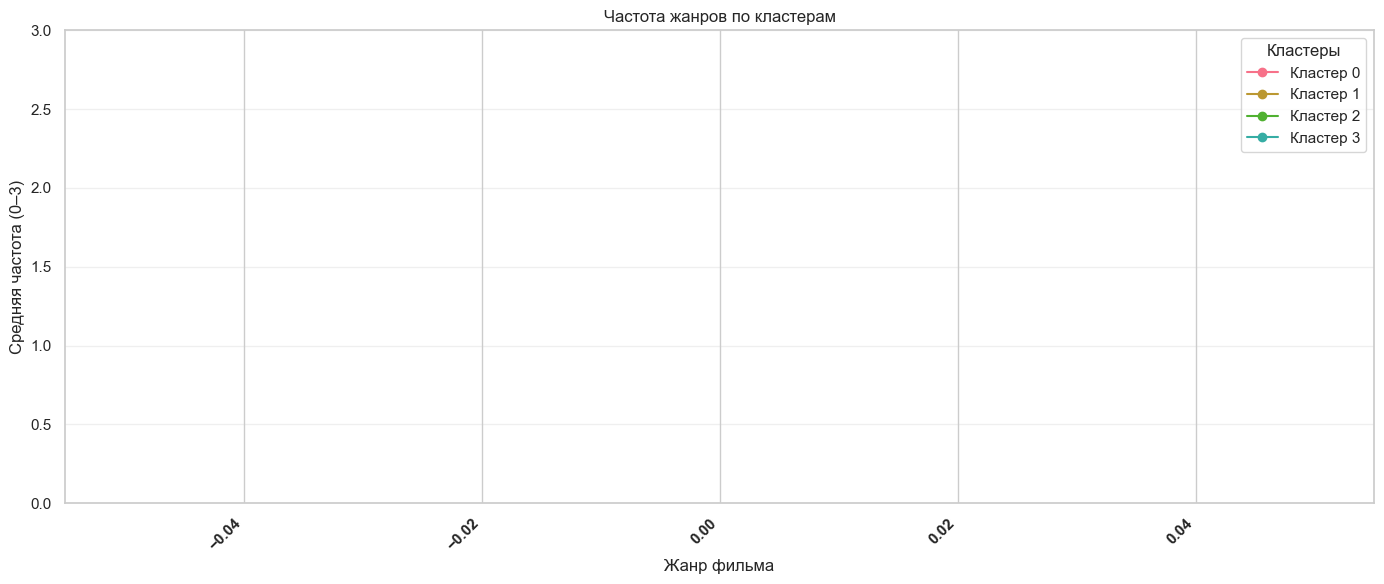

In [50]:
# Определение переменной frequency_cols — список с названиями столбцов, которые содержат частоты жанров
frequency_cols = [col for col in cluster_features.columns if 'Frequency' in col]

# Вычисляем средние значения для каждого кластера по основным характеристикам
summary = cluster_features.groupby('cluster')[['runtime', 'imdb_score', 'tmdb_score']].mean()

# Вычисляем средние значения для каждого кластера по жанрам
genre_distribution = cluster_features.groupby('cluster')[frequency_cols].mean()

# Функция для получения наиболее популярных жанров в кластере
def top_genres(row, n=3):
    top = row.dropna().sort_values(ascending=False).head(n)
    return [col.split('[')[-1].replace(']', '') for col in top.index]

# Функция для интерпретации кластера
def interpret_cluster(cluster_id, means_row, genre_row):
    genres = top_genres(genre_row)
    return f"""Кластер {cluster_id}:
        - Средняя длительность фильма: {means_row['runtime']:.1f} мин
        - Средний рейтинг IMDb: {means_row['imdb_score']:.1f}
        - Средний рейтинг TMDb: {means_row['tmdb_score']:.1f}
        - Популярные жанры: {', '.join(genres) if genres else 'нет данных'}
        """.strip()

# Печать общей информации по кластерам
print("Общие данные про кластеры:")
for cluster_id in summary.index:
    if cluster_id in genre_distribution.index:
        desc = interpret_cluster(
            cluster_id,
            summary.loc[cluster_id],
            genre_distribution.loc[cluster_id]
        )
        print(desc)
        print('-' * 60)

# Визуализация жанров для каждого кластера
plt.figure(figsize=(14, 6))
for cluster_id, row in genre_distribution.iterrows():
    genres = row.index.str.extract(r'Frequency\[(.*)\]')[0]  # Извлекаем жанры из названий колонок
    plt.plot(genres, row.values, marker='o', label=f'Кластер {cluster_id}')

plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.title('Частота жанров по кластерам')
plt.xlabel('Жанр фильма')
plt.ylabel('Средняя частота (0–3)')
plt.ylim(0, 3)
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Кластеры')
plt.tight_layout()
plt.show()